In [195]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
import math
import pickle

# Functions

In [196]:
def dist(a, b):
    return math.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2 )


def Thor_step(x_T, y_T, x_s, y_s):
    global stop_game
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_T[-1] != 0.5:
        directions += ["DOWN"]
    if y_T[-1] != n-0.5:
        directions += ["UP"]
    if x_T[-1] != 0.5:
        directions += ["LEFT"]
    if x_T[-1] != n-0.5:
        directions += ["RIGHT"]

    step = random.choice(directions)

    # Update the coordinates based on the chosen direction
    if step == "RIGHT":
        x = np.append(x_T, x_T[-1] + 1)
        y = np.append(y_T, y_T[-1])
    elif step == "LEFT":
        x = np.append(x_T, x_T[-1] - 1)
        y = np.append(y_T, y_T[-1])
    elif step == "UP":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]+ 1)
    elif step == "DOWN":
        x = np.append(x_T, x_T[-1] )
        y = np.append(y_T, y_T[-1]- 1)
    
    return x, y


def Loki_step(x_L, y_L, x_s, y_s):
    global stop_game
    
    directions = []  # Possible directions
    #conditions to not leave the bounds
    if y_L[-1] != 0.5:
        directions += ["DOWN"]
    if y_L[-1] != n-0.5:
        directions += ["UP"]
    if x_L[-1] != 0.5:
        directions += ["LEFT"]
    if x_L[-1] != n-0.5:
        directions += ["RIGHT"]
    
    R_coords = {'UP':(x_L[-1],y_L[-1]+1), 'DOWN':(x_L[-1],y_L[-1]-1), 'LEFT':(x_L[-1]-1,y_L[-1]), 'RIGHT':(x_L[-1]+1,y_L[-1])}
    
    if (x_s, y_s) in R_coords.values():
        step = [i for i in R_coords if R_coords[i]==(x_s, y_s)]
    else: 
        Total_weights = 0
        for i in directions:
            Total_weights += 1/(dist((x_s, y_s), R_coords[i]))

        weightss = []
        for i in directions:
            weightss += [(1/dist((x_s, y_s), R_coords[i]))/Total_weights]

        step = random.choices(directions, weights=weightss, k=1)

    # Update the coordinates based on the chosen direction
    if step[0] == "RIGHT":
        x = np.append(x_L, x_L[-1] + 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "LEFT":
        x = np.append(x_L, x_L[-1] - 1)
        y = np.append(y_L, y_L[-1])
    elif step[0] == "UP":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]+ 1)
    elif step[0] == "DOWN":
        x = np.append(x_L, x_L[-1] )
        y = np.append(y_L, y_L[-1]- 1)

    return x, y


def run_game(x_L, y_L, x_T, y_T, x_s, y_s):
    global stop_game
    global curr_len
    
    while stop_game == False:
        if  (x_T[-1], y_T[-1]) == (x_s, y_s):
            stop_game = True
            game_outcome = 0
            break
        elif  (x_L[-1], y_L[-1]) == (x_s, y_s):
            stop_game = True
            game_outcome = 1
            break
        curr_len += 1
        
        (x_T, y_T) = Thor_step(x_T, y_T, x_s, y_s)
        (x_L, y_L) = Loki_step(x_L, y_L, x_s, y_s)
    
    '''
    dot_size = int(500/n)
    
    fig = plt.figure(figsize = [10,10])
    ax = fig.add_subplot(1, 1, 1)
    
    
    grid_ticks = np.arange(0, n+1, 1)
    ax.set_xticks(grid_ticks)
    ax.set_yticks(grid_ticks)
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.5,alpha=0.5)

    plt.plot([0,0,n,n,0], [0,n,n,0,0])
    plt.plot(x_s, y_s, marker="o", markersize=dot_size, markeredgecolor="red", markerfacecolor="red")
    plt.plot(x_T[0], y_T[0], marker="o", markersize=dot_size, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(x_L[0], y_L[0], marker="o", markersize=dot_size*0.8, markeredgecolor="black", markerfacecolor="black")
    plt.plot(x_T, y_T, color='b')
    plt.plot(x_L, y_L, color='k')
    #fig.savefig('piccccture.png')
    plt.show()
    '''
    return game_outcome

#calculate fist pasage time

def first_pasage_time(start, end, n, Matrix):
    ''' 'start' is the starting state, 
    'end' is stone state, 
    'n' is number of steps and 
    'Matrix' is the transition matrix'''
    
    def loop_rec(n, seq):
        global All_paths
        '''n is time
        seq is a list of states to visit in backwards order, states start at 0'''
        if n>1:
            for i in np.nonzero(Matrix[seq[0]])[0]:
                loop_rec(n-1, [i]+seq)
        else:
            for i in np.nonzero(Matrix[seq[0]])[0]:
                All_paths += [[i]+seq]
    
    loop_rec(n, [start])  
    Good_paths = [All_paths[i] for i in range(len(All_paths)) if (All_paths[i][0]==end and All_paths[i][0]!=All_paths[i][1])]
    prod = 0
    for i in Good_paths:
        curr = 1
        for j in range(n):
            curr = curr*Matrix[i[n-j]][i[n-j-1]]
        prod += curr
    
    return prod

def coord_to_int(coord):
    global n #field size
    a= coord[0]
    b = coord[1]
    return (b-1)*n+a

# The game

In [197]:
n = 3 #define the size of the square

In [198]:
game_number = 0  #clear the game history
game_record = [] 
game_lengths = []

In [199]:
#starting position for the stone
x_s =  n/2
y_s =  n/2

In [200]:
#main code

for i_L in range(n):
        for j_L in range(n):
            for i_T in range(n):
                for j_T in range(n):
                    stop_game = False  

                    x_L = np.array([i_L+0.5])
                    y_L = np.array([j_L+0.5])
                    x_T = np.array([i_T+0.5])
                    y_T = np.array([j_T+0.5])

                    curr_len = 0
                    game_outcome = run_game(x_L, y_L, x_T, y_T, x_s, y_s )
                    game_record += [game_outcome]
                    game_lengths += [curr_len]
                    game_number += 1
                    

In [201]:
probability = (sum(game_record) / game_number)
average_game_len = sum(game_lengths) / len(game_lengths)

probability, average_game_len

(0.6790123456790124, 1.123456790123457)

In [202]:
game_number

81

In [203]:
'''
with open("data_stochastics_octant.txt", "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump((probability, average_game_len, game_lengths), f)
'''

'\nwith open("data_stochastics_octant.txt", "wb") as f: # "wb" because we want to write in binary mode\n    pickle.dump((probability, average_game_len, game_lengths), f)\n'

In [157]:
'''
with open("data_stochastics_octant.txt", "rb") as f: # "wb" because we want to write in binary mode
    data = pickle.load(f)
'''

'\nwith open("data_stochastics_octant.txt", "rb") as f: # "wb" because we want to write in binary mode\n    data = pickle.load(f)\n'

In [158]:
data = game_lengths

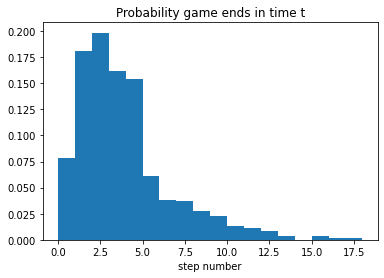

In [159]:
plt.hist(data, max(data), density=True)
#plt.plot([math.exp(-average_game_len)*((average_game_len)**i)/(math.factorial(i)) for i in range(max(data))])
plt.title('Probability game ends in time t')
plt.xlabel('step number')

#plt.savefig('histogram.png')
plt.show() 

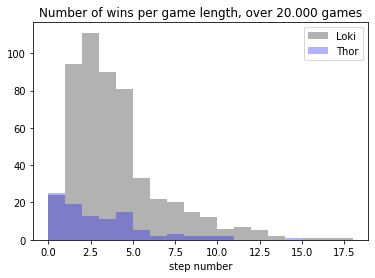

In [160]:
game_lengths = np.array(game_lengths) 
Loki_wins = game_lengths[[game_record[i]== 1 for i in range(len(game_record))]]
Loki_wins.tolist()
Thor_wins = game_lengths[[game_record[i]== 0 for i in range(len(game_record))]]
Thor_wins.tolist()

plt.hist(Loki_wins,histtype='stepfilled', alpha=0.3, bins=max(Loki_wins), color="k")
plt.hist(Thor_wins,histtype='stepfilled', alpha=0.3, bins=max(Thor_wins), color="b")
plt.title('Number of wins per game length, over 20.000 games')
plt.xlabel('step number')
plt.legend(['Loki', 'Thor'])

#plt.savefig('histogram2.png')
plt.show() 

### Modif. Matrix maker


In [205]:
MatrixL = np.array([[0.]*(n**2)]*(n**2))
MatrixT = np.array([[0.]*(n**2)]*(n**2))

In [206]:
s_x = math.ceil(n/2)
s_y = math.ceil(n/2)
for a in range(1, n+1):
    for b in range(1, n+1):
        directions = []  # Possible directions
        #conditions to not leave the bounds
        if b != 1:
            directions += ["DOWN"]
        if b != n:
            directions += ["UP"]
        if a != 1:
            directions += ["LEFT"]
        if a != n:
            directions += ["RIGHT"]
        
        R_coords = {'UP':(a,b+1), 'DOWN':(a,b-1), 'LEFT':(a-1,b), 'RIGHT':(a+1,b)}
    
        if (s_x, s_y) in R_coords.values():
            MatrixL[coord_to_int((a,b))-1][coord_to_int((s_x,s_y))-1]=1
        elif (s_x, s_y) == (a,b):
            pass
        else: 
            Total_weights = 0
            for i in directions:
                Total_weights += 1/(dist((s_x, s_y), R_coords[i]))
            for i in directions:
                MatrixL[coord_to_int((a,b))-1][coord_to_int(R_coords[i])-1]=((1/dist((s_x, s_y), R_coords[i]))/Total_weights)

for a in range(1, n+1):
    for b in range(1, n+1):
        directions = []  # Possible directions
        #conditions to not leave the bounds
        if b != 1:
            directions += ["DOWN"]
        if b != n:
            directions += ["UP"]
        if a != 1:
            directions += ["LEFT"]
        if a != n:
            directions += ["RIGHT"]
        
        R_coords = {'UP':(a,b+1), 'DOWN':(a,b-1), 'LEFT':(a-1,b), 'RIGHT':(a+1,b)}
        if (s_x, s_y) == (a,b):
            pass
        else:
            for i in directions:
                MatrixT[coord_to_int((a,b))-1][coord_to_int(R_coords[i])-1]=1/len(directions)




In [207]:
'''np.savetxt("Transition_matrixL_5x5.csv", MatrixL, delimiter=",")'''

'np.savetxt("Transition_matrixL_5x5.csv", MatrixL, delimiter=",")'

In [114]:
MatrixF = np.array([MatrixT[0], MatrixT[1], MatrixT[2], MatrixT[3], MatrixT[4],MatrixT[5],MatrixL[6],MatrixL[7],MatrixL[8],MatrixT[9],MatrixT[10],MatrixL[11],MatrixL[12],MatrixL[13],MatrixT[14],MatrixT[15],MatrixL[16],MatrixL[17],MatrixL[18],MatrixT[19],MatrixT[20], MatrixT[21], MatrixT[22], MatrixT[23], MatrixT[24] ])

### First passage time calculations with ugly sums

In [478]:
All_fpt_L = []
All_fpt_T = []
for t in range(15):
    list_fpt_l= [0]*25
    list_fpt_t= [0]*25
    diff_list_l = []
    diff_list_t = []
 
    for i in [0, 1, 2, 6, 7, 12]: #the 6 different starting points, everything else is just these but reflected / rotated.
        All_paths=[]
        diff_list_l += [first_pasage_time(i, 12, t, MatrixL)]
        All_paths=[]
        diff_list_t += [first_pasage_time(i, 12, t, MatrixT)]
          
    for i in [0, 4, 19, 24]: #symmetric states to 0
        list_fpt_l[i] = diff_list_l[0]
        list_fpt_t[i] = diff_list_t[0]
       
    for i in [1, 3, 5, 9, 15, 19, 21, 23]: #symmetric states to 1
        list_fpt_l[i] = diff_list_l[1]
        list_fpt_t[i] = diff_list_t[1]
        
        
    for i in [2, 10, 14, 22]: #symmetric states to 2
        list_fpt_l[i] = diff_list_l[2]
        list_fpt_t[i] = diff_list_t[2]
        
    for i in [6, 8, 16, 18]: #symmetric states to 6
        list_fpt_l[i] = diff_list_l[3]
        list_fpt_t[i] = diff_list_t[3]
    
    for i in [7, 11, 13, 17]: #symmetric states to 7
        list_fpt_l[i] = diff_list_l[4]
        list_fpt_t[i] = diff_list_t[4]
        
    list_fpt_l[12] = diff_list_l[5] #12 is unique
    list_fpt_t[12] = diff_list_t[5]
    
    All_fpt_L += [list_fpt_l]
    All_fpt_T += [list_fpt_t]

### First passage time calculations but with matrices this time

In [209]:
tau = 40
All_fpt_L = np.array([[0.]*(n**2)]*(tau))
All_fpt_T = np.array([[0.]*(n**2)]*(tau))

All_fpt_L[0][coord_to_int((s_x,s_y))-1]=1
All_fpt_T[0][coord_to_int((s_x,s_y))-1]=1

for i in range(n**2):    
    P_L= [[0]*(n**2)]
    P_L[0][i] = 1
    P_T = P_L
    for time in range(1, tau):
        P_Ln = np.matmul(P_L,MatrixL )
        P_Tn = np.matmul(P_T,MatrixT )
        P_L = P_Ln
        P_T = P_Tn
        
        All_fpt_L[time][i] = P_L[0][coord_to_int((s_x,s_y))-1]
        All_fpt_T[time][i] = P_T[0][coord_to_int((s_x,s_y))-1]
        


In [270]:
MatrixxL= [[0., 0.59, 0., 0.41, 0., 0.],
 [0.18, 0., 0.41, 0., 0.41, 0.],
 [0., 0., 0., 0., 0., 1],
 [0.31, 0., 0., 0., 0.69, 0.],
 [0., 0., 0., 0., 0., 1],
 [0., 0., 0., 0., 0., 1]]

In [246]:
MatrixxT = [[0., 0.5, 0., 0.5, 0., 0.],
  [1/3, 0., 1/3, 0., 1/3, 0.],
  [0., 0.5, 0., 0., 0., 0.5],
  [0.5, 0., 0., 0., 0.5, 0.],
  [0., 1/3, 0., 1/3, 0., 1/3],
  [0., 0., 0., 0., 0., 1]];

## program the formula to find the theretical answer


In [210]:
TTotal = 0 
for Loki_start in range(n**2):
    for Thor_start in range(n**2): # sum over innitial states
        curr_sum=0
        for time in range(tau):
            thrr=sum([All_fpt_T[k][Thor_start] for k in range(time+1)])
            curr_sum = (1/(n**2))*(1/(n**2))*All_fpt_L[time][Loki_start]*(1-thrr)
            TTotal += curr_sum
TTotal

0.6913580246913575